In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from akita_utils.format_io import h5_to_df
from scipy import stats

In [2]:
# python collect_jobs_and_clean.py /scratch2/smaruj/disruption_by_permutation_rc_m0 -g -l -n

In [3]:
stat_names = ["SCD", "SSD", "INS-16", "INS-64"]

In [4]:
# reading h5 files to dataframes
df_m0 = h5_to_df("/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/disruption_by_permutation/model_0.h5", stat_names, average=False)
df_rc_m0 = h5_to_df("/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/reverse_compliment/model_0_rc.h5", stat_names, average=False) 

In [5]:
SCD_m0 = df_m0[["SCD_h1_m0_t0", "SCD_h1_m0_t1", "SCD_h1_m0_t2", "SCD_h1_m0_t3", "SCD_h1_m0_t4", "SCD_h1_m0_t5"]].mean(axis=1)
SCD_rc_m0 = df_rc_m0[["SCD_h1_m0_t0", "SCD_h1_m0_t1", "SCD_h1_m0_t2", "SCD_h1_m0_t3", "SCD_h1_m0_t4", "SCD_h1_m0_t5"]].mean(axis=1)

## Disruption scores for specific sites are not strand-sensitive

Text(0, 0.5, 'aveSCD, random complement')

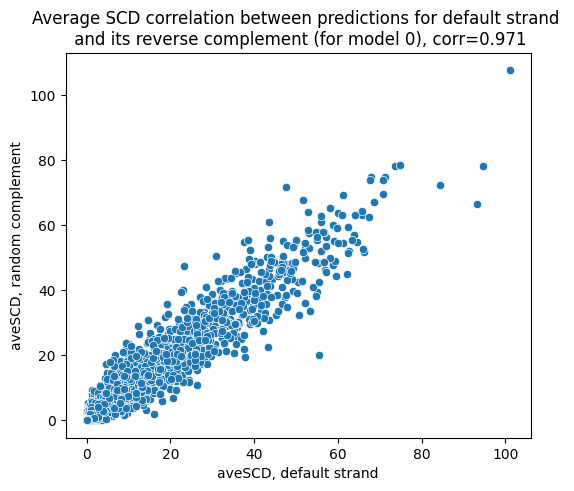

In [6]:
plt.figure(figsize=(6,5))
sn.scatterplot(x=SCD_m0, y=SCD_rc_m0)
rc_corr = round(stats.pearsonr(SCD_m0, SCD_rc_m0).statistic, 4)
plt.title(f"Average SCD correlation between predictions for default strand \n and its reverse complement (for model 0), corr={rc_corr}")
plt.xlabel("aveSCD, default strand")
plt.ylabel("aveSCD, random complement")